In [1]:
import pandas as pd
import numpy as np

file = '../../../DATA/OSA_python.xlsx'
data = pd.read_excel(file)
df = pd.DataFrame(data)

In [2]:
df.set_index('Patient', inplace=True)
df.head()

,Gender,IAH,Weight,Height,Age,Cervical,BMI
Patient,,,,,,,
P0002,1,29.6,119,174,56,48.0,0.003931
P0004,1,19.7,78,168,39,42.0,0.002764
P0005,1,9.0,80,173,32,40.0,0.002673
P0006,1,2.0,109,190,32,42.0,0.003019
P0007,1,34.0,86,169,39,42.0,0.003011


In [5]:
#features 
predictors = ['Gender', 'Weight', 'Height', 'Age', 'Cervical', 'BMI']
x = df[predictors]
y = df['IAH']

# Fittings 

In [ ]:
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets

#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
x, y = datasets.make_regression(n_samples=30, n_features=1, noise=10)

y=y**2
model = LinearRegression().fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x,model.predict(x), "g")
plt.show()

In [ ]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor
x_test= np.linspace(x.min(),x.max(), 100)[:, np.newaxis]

model = DecisionTreeRegressor().fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "g")
plt.show()

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "g")
plt.show()

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "g")
plt.show()

# Add cross-validation 

In [28]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import  mean_absolute_error, mean_squared_error, max_error, r2_score
from sklearn import model_selection
from sklearn import datasets
from sklearn import linear_model

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.2)


## LINEAR REGRESSION

In [90]:
from sklearn.linear_model import LinearRegression
model_linear = linear_model.LinearRegression().fit(x_train,y_train)

In [91]:
from sklearn.model_selection import cross_val_predict, cross_val_score
y_out_linear = cross_val_predict(model_linear, x_test, y_test, cv = 3)

In [92]:
mse_lin = mean_squared_error(y_test, y_out_linear)
rmse_lin =  mean_squared_error(y_test, y_out_linear, squared=False)
mae_lin = mean_absolute_error(y_test, y_out_linear)
r2_lin = r2_score(y_test, y_out_linear)

mse_cross = cross_val_score(model_linear, x_test, y_test, cv = 3, scoring = 'neg_mean_squared_error')
rmse_cross = cross_val_score(model_linear, x_test, y_test, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_cross = cross_val_score(model_linear, x_test, y_test, cv = 3, scoring = 'neg_mean_absolute_error')
r2_cross = cross_val_score(model_linear, x_test, y_test, cv = 3, scoring = 'r2')

print("MSE: ",mse)
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 score: ",r2)

print("MSE cross validated: ",abs(mse_cross.mean()))
print("RMSE cross validated: ",abs(rmse_cross.mean()))
print("MAE cross validated: ",abs(mae_cross.mean()))
print("R2 score cross validated: ",r2_cross.mean())

MSE:  258.29095748031494
RMSE:  16.07143296287904
MAE:  12.853385826771655
R2 score:  0.13672453415667174
MSE cross validated:  248.78757619566105
RMSE cross validated:  15.759750148286335
MAE cross validated:  12.625325635900467
R2 score cross validated:  0.15814487733830032


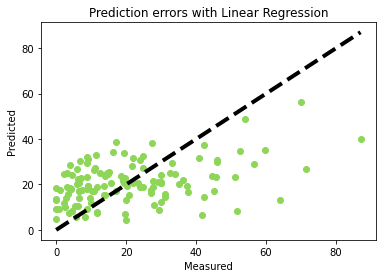

<Figure size 432x288 with 0 Axes>

In [95]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_out_linear, c  = '#8DD657')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Linear Regression')
plt.show()



## Decision tree

In [61]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor().fit(x_train, y_train)

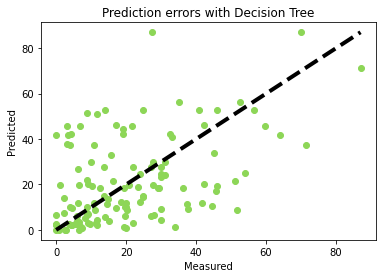

In [64]:
y_out_tree = cross_val_predict(model_tree, x_test, y_test, cv = 3)

fig, ax = plt.subplots()
ax.scatter(y_test, y_out_tree, c  = '#8DD657')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Decision Tree')
plt.show()


In [76]:
mse_tree = mean_squared_error(y_test, y_out_tree)
rmse_tree =  mean_squared_error(y_test, y_out_tree, squared=False)
mae_tree = mean_absolute_error(y_test, y_out_tree)
r2_tree = r2_score(y_test, y_out_tree)

mse_cross = cross_val_score(model_tree, x_test, y_test, cv = 3, scoring = 'neg_mean_squared_error')
rmse_cross = cross_val_score(model_tree, x_test, y_test, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_cross = cross_val_score(model_tree, x_test, y_test, cv = 3, scoring = 'neg_mean_absolute_error')
r2_cross = cross_val_score(model_tree, x_test, y_test, cv = 3, scoring = 'r2')

print("MSE: ",mse)
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 score: ",r2)

print("MSE cross validated: ",abs(mse_cross.mean()))
print("RMSE cross validated: ",abs(rmse_cross.mean()))
print("MAE cross validated: ",abs(mae_cross.mean()))
print("R2 score cross validated: ",r2_cross.mean())

MSE:  258.29095748031494
RMSE:  16.07143296287904
MAE:  12.853385826771655
R2 score:  0.13672453415667174
MSE cross validated:  332.9579789590254
RMSE cross validated:  18.670883128981544
MAE cross validated:  13.351513473606497
R2 score cross validated:  -0.15875105310001233


## Random forest

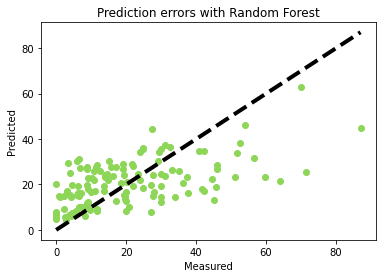

In [67]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor().fit(x_train, y_train)

y_out_forest = cross_val_predict(model_forest, x_test, y_test, cv = 3)

fig, ax = plt.subplots()
ax.scatter(y_test, y_out_forest, c  = '#8DD657')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Random Forest')
plt.show()



In [77]:
mse_for = mean_squared_error(y_test, y_out_forest)
rmse_for =  mean_squared_error(y_test, y_out_forest, squared=False)
mae_for = mean_absolute_error(y_test, y_out_forest)
r2_for = r2_score(y_test, y_out_forest)

mse_cross = cross_val_score(model_forest, x_test, y_test, cv = 3, scoring = 'neg_mean_squared_error')
rmse_cross = cross_val_score(model_forest, x_test, y_test, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_cross = cross_val_score(model_forest, x_test, y_test, cv = 3, scoring = 'neg_mean_absolute_error')
r2_cross = cross_val_score(model_forest, x_test, y_test, cv = 3, scoring = 'r2')

print("MSE: ",mse)
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 score: ",r2)

print("MSE cross validated: ",abs(mse_cross.mean()))
print("RMSE cross validated: ",abs(rmse_cross.mean()))
print("MAE cross validated: ",abs(mae_cross.mean()))
print("R2 score cross validated: ",r2_cross.mean())

MSE:  258.29095748031494
RMSE:  16.07143296287904
MAE:  12.853385826771655
R2 score:  0.13672453415667174
MSE cross validated:  210.7118735747508
RMSE cross validated:  14.407255694769765
MAE cross validated:  11.544967700258397
R2 score cross validated:  0.32133817426287226


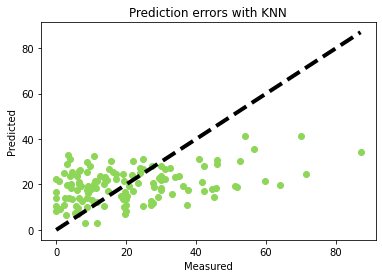

In [68]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor().fit(x_train, y_train)

y_out_knn = cross_val_predict(model_knn, x_test, y_test, cv = 3)

fig, ax = plt.subplots()
ax.scatter(y_test, y_out_knn, c  = '#8DD657')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with KNN')
plt.show()

In [78]:
mse_knn = mean_squared_error(y_test, y_out_knn)
rmse_knn =  mean_squared_error(y_test, y_out_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_out_knn)
r2_knn = r2_score(y_test, y_out_knn)

mse_cross = cross_val_score(model_knn, x_test, y_test, cv = 3, scoring = 'neg_mean_squared_error')
rmse_cross = cross_val_score(model_knn, x_test, y_test, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_cross = cross_val_score(model_knn, x_test, y_test, cv = 3, scoring = 'neg_mean_absolute_error')
r2_cross = cross_val_score(model_knn, x_test, y_test, cv = 3, scoring = 'r2')

print("MSE: ",mse)
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 score: ",r2)

print("MSE cross validated: ",abs(mse_cross.mean()))
print("RMSE cross validated: ",abs(rmse_cross.mean()))
print("MAE cross validated: ",abs(mae_cross.mean()))
print("R2 score cross validated: ",r2_cross.mean())

MSE:  258.29095748031494
RMSE:  16.07143296287904
MAE:  12.853385826771655
R2 score:  0.13672453415667174
MSE cross validated:  257.86047124400153
RMSE cross validated:  16.01388560195553
MAE cross validated:  12.843983019564414
R2 score cross validated:  0.1314446080814874


In [72]:
results = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2'], index=['Linear regresion', 'Decision Tree', 'Random Forest', 'KNN'])

In [74]:
results 

,MSE,RMSE,MAE,R2
Linear regresion,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN


In [104]:
results = pd.DataFrame({'Model': ['Linear regresion', 'Decision Tree', 'Random Forest', 'KNN'],
                        'MSE':   [mse_lin, mse_tree, mse_for, mse_knn],
                'RMSE': [rmse_lin, rmse_tree, rmse_for, rmse_knn],
                   'MAE': [mae_lin, mae_tree, mae_for, mae_knn],
                   'R2': [r2_lin, r2_tree, r2_for, r2_knn]})

In [105]:
results

,Model,MSE,RMSE,MAE,R2
0,Linear regresion,249.016192,15.780247,12.625224,0.167723
1,Decision Tree,350.925906,18.733016,13.868504,-0.172886
2,Random Forest,208.131897,14.426777,11.446252,0.304369
3,KNN,258.290957,16.071433,12.853386,0.136725


([None, None, None, None, None, None, None, None, None, None], None)

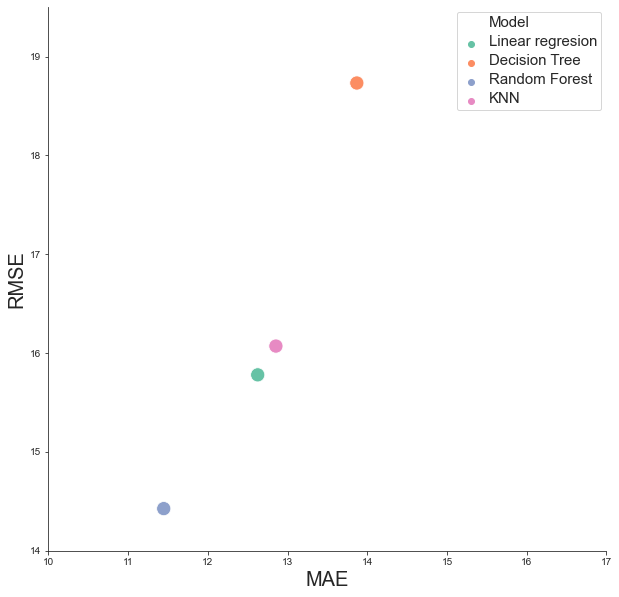

In [117]:
import seaborn as sns
x, y, hue = 'MAE', 'RMSE', 'Model'
plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white"), sns.set_style("ticks")
ax = sns.scatterplot(x= x, y=y, data = results, hue = hue, palette="Set2", s=200)
ax.set_xlabel(x,fontsize=20), ax.set_ylabel(y,fontsize=20) 
ax.set(ylim=(14, 19.5), xlim=(10,17)) 
plt.setp(ax.get_legend().get_texts(), fontsize='15'), sns.despine()

# KFold crossvalidation

In [4]:
#imports si no vamos a hacer lo de fittings
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import  mean_absolute_error, mean_squared_error, max_error, r2_score
from sklearn import model_selection
#from sklearn import datasets
from sklearn.model_selection import KFold

In [11]:
#features 
predictors = ['Gender', 'Weight', 'Height', 'Age', 'Cervical', 'BMI']
x = df[predictors].values
y = df['IAH'].values

In [12]:
print(x, y)

[[1.00000000e+00 1.19000000e+02 1.74000000e+02 5.60000000e+01
  4.80000000e+01 3.93050601e-03]
 [1.00000000e+00 7.80000000e+01 1.68000000e+02 3.90000000e+01
  4.20000000e+01 2.76360544e-03]
 [1.00000000e+00 8.00000000e+01 1.73000000e+02 3.20000000e+01
  4.00000000e+01 2.67299275e-03]
 ...
 [1.00000000e+00 9.00000000e+01 1.80000000e+02 5.00000000e+01
  4.20000000e+01 2.77777778e-03]
 [2.00000000e+00 6.60000000e+01 1.64000000e+02 5.70000000e+01
  3.50000000e+01 2.45389649e-03]
 [2.00000000e+00 7.00000000e+01 1.63000000e+02 6.00000000e+01
  3.50000000e+01 2.63464940e-03]] [ 29.6   19.7    9.     2.    34.    60.    22.    11.     3.7    7.
   5.    26.    22.    10.    15.     4.3   20.    56.     4.    53.6
   2.1   27.    47.     5.9    9.    32.    11.    24.6   14.8   17.
  31.5   43.    12.8   37.3    3.    19.3   34.    46.3   33.1   43.1
  27.     0.    28.    28.3   32.     3.    69.    32.    38.6   31.
  36.    34.     2.     5.    24.    13.7   40.     9.7   10.     0.
  11.3  

In [15]:

models = {"Linear Regression":LinearRegression(), \
          "Decision Tree": DecisionTreeRegressor(), \
          "Random Forest": RandomForestRegressor(n_estimators=100), \
          "Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)}


for name in models:
    print("Start training models of {}".format(name))
    k = 5
    kf = KFold(n_splits=k)
    precisions = []
    i = 0
    me_global = []
    mae_global = []
    mse_global = []
    rmse_global = []
    for train, test in kf.split(x):
        i+=1
        x_train, x_test = x[train], x[test]
        y_train, y_test = y[train], y[test]
        model = models[name].fit(x_train,y_train)
        y_out = model.predict(x_test)
        # We have to provide the real value of the target and the model's output
        me = max_error(y_test, y_out)
        mae = mean_absolute_error(y_test, y_out)
        mse = mean_squared_error(y_test, y_out)
        rmse = mean_squared_error(y_test, y_out, squared=False)
        me_global.append(mae)
        mae_global.append(mae)
        mse_global.append(mse)
        rmse_global.append(mse)
        print("Iteration {}: me={:.4f} mae={:.4f} mse={:.4f} rmse={:.4f}".format(i,me, mae, mse, rmse))
    print("Global: me={:.4f} mae={:.4f} mse={:.4f} rmse={:.4f}\n".format(np.average(me_global), np.average(mae_global), np.average(mse_global), np.average(rmse_global)))

Start training models of Linear Regression
Iteration 1: me=45.7619 mae=11.7069 mse=206.0662 rmse=14.3550
Iteration 2: me=39.8980 mae=11.3477 mse=196.7352 rmse=14.0262
Iteration 3: me=84.5733 mae=14.5897 mse=427.4101 rmse=20.6739
Iteration 4: me=40.7482 mae=11.3326 mse=208.8643 rmse=14.4521
Iteration 5: me=86.5777 mae=13.4585 mse=335.8650 rmse=18.3266
Global: me=12.4871 mae=12.4871 mse=274.9882 rmse=274.9882

Start training models of Decision Tree
Iteration 1: me=63.1000 mae=15.7391 mse=458.3835 rmse=21.4099
Iteration 2: me=81.4000 mae=16.7926 mse=550.1675 rmse=23.4556
Iteration 3: me=78.4000 mae=15.7425 mse=510.4928 rmse=22.5941
Iteration 4: me=83.8000 mae=15.5299 mse=477.4516 rmse=21.8507
Iteration 5: me=74.3000 mae=18.3213 mse=594.1233 rmse=24.3746
Global: me=16.4251 mae=16.4251 mse=518.1237 rmse=518.1237

Start training models of Random Forest
Iteration 1: me=55.3200 mae=12.3591 mse=250.0186 rmse=15.8120
Iteration 2: me=38.2810 mae=11.6603 mse=217.2185 rmse=14.7383
Iteration 3: me=6